In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from learning_algorithm.algo.logistic_regression import LogisticRegressionGradientDescent
from learning_algorithm.viz.plot import plot_decision_regions

In [4]:
flowers = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      header=None)

In [37]:
# select setosa and versicolor
# extract petal width
y = flowers.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

In [38]:
# extract sepal length and petal length
x = flowers.iloc[0:100, [0, 2]].values

NameError: name 'ada1' is not defined

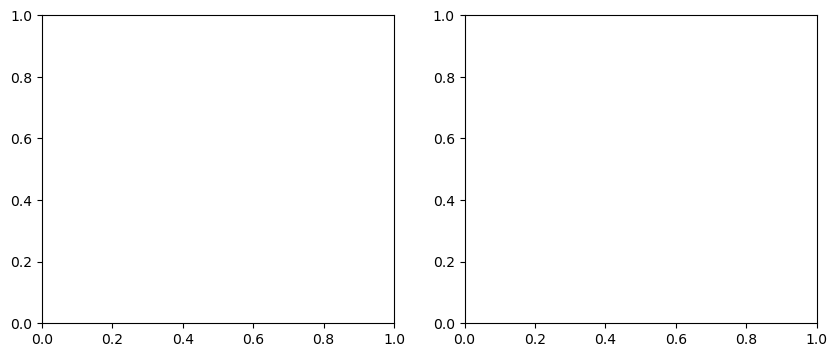

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
lgr1 = LogisticRegressionGradientDescent(eta=.05, n_iter=1000).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Logarithmic-error')
ax[0].set_title('Logistic Regression - Learning rate 0.05')

lgr2 = LogisticRegressionGradientDescent(eta=.0001, n_iter=1000).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Logarithmic-error')
ax[1].set_title('Logistic Regression - Learning rate 0.0001')

/Users/facts/Documents/workspaces/github/machine_learning_training/supervised/classification/learning_algorithm/learning_algorithm/viz/plot.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == clazz, 0],


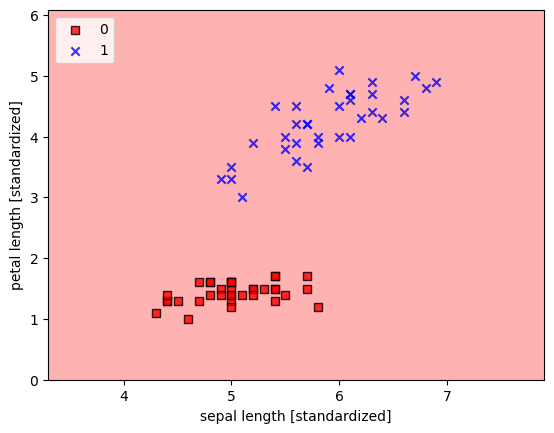

In [41]:
# Check that our implementation works
x_train, x_test, y_train, t_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)
lgr3 = LogisticRegressionGradientDescent(eta=0.05, 
                                         n_iter=1000,
                                         random_state=1)
lgr3.fit(x_train,
         y_train)
plot_decision_regions(x_train,
                      y_train,
                      lgr3)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

In [42]:
def convert_class(x):
    if x[4] == "Iris-setosa":
        return 0
    elif x[4] == "Iris-versicolor":
        return 1
    elif x[4] == "Iris-virginica":
        return 2

In [43]:
# select setosa, versicolor, and virginica
y = flowers.apply(convert_class, axis=1).to_numpy()

In [44]:
# extract sepal length and petal length
x = flowers.iloc[0:, [0, 2]].values

In [45]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

/Users/facts/Documents/workspaces/github/machine_learning_training/supervised/classification/learning_algorithm/learning_algorithm/viz/plot.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == clazz, 0],


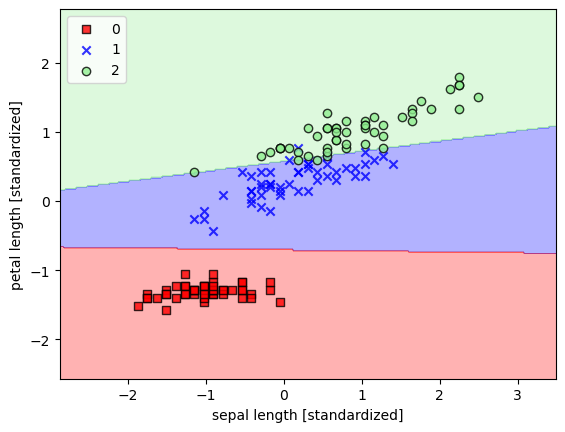

In [46]:
# Check that our implementation works
x_train_std, x_test_std, y_train, t_test = train_test_split(x_std,
                                                            y,
                                                            test_size=0.3,
                                                            random_state=0,
                                                            stratify=y)
lgr4 = LogisticRegression(C=100.00, random_state=1)
lgr4.fit(x_train_std, y_train)
plot_decision_regions(x_std,
                      y,
                      lgr4)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

In [47]:
# Predict the probabilities of the first 
# three class samples in the test set
# First row = Corresponds to the class-membership of the first flower
# Second row = Corresponds to the class-membership of the second flower
# Third row = Corresponds to the class-membership of the third flower
lgr4.predict_proba(x_test_std[:3, :])

array([[1.23486197e-10, 2.40299579e-03, 9.97597004e-01],
       [4.00970786e-08, 4.80630382e-02, 9.51936922e-01],
       [9.96378949e-01, 3.62105119e-03, 8.16752350e-15]])

In [48]:
# Notice that the columnbs sum up to one, as expected
lgr4.predict_proba(x_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [49]:
# We can predict the class labels by identifying the largest
# column in each row
lgr4.predict_proba(x_test_std[:3, :]).argmax(axis=1)

array([2, 2, 0])

In [50]:
# The predict method can more directly display the conditional probabilities
lgr4.predict(x_test_std[:3, :])

array([2, 2, 0])

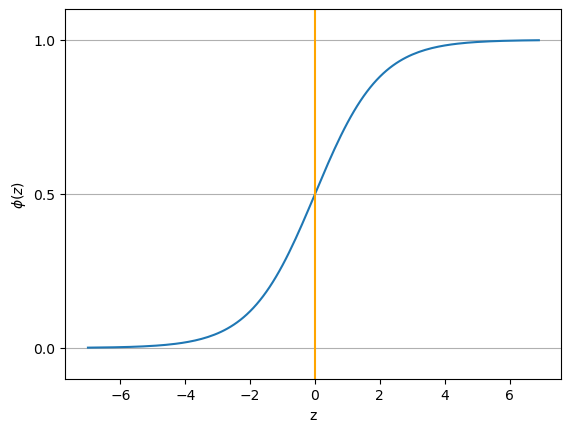

In [51]:
# Plot the sigmoid function for some values in the range of -7 to 7.
z = np.arange(-7, 7, 0.1)
phi_z = LogisticRegressionGradientDescent.sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='orange')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

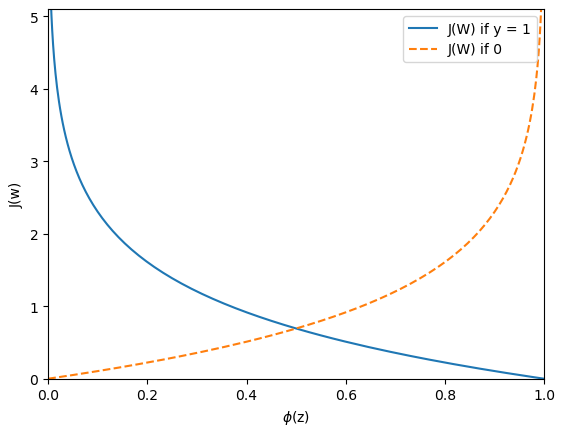

In [19]:
# Cost of classifying a singles-sample instance for different values of phi_z
# We can that the cost approaches 0 (continous line) if we correctly predict that a sample
# belongs to class 1.  Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly
# predict y = 0 (dashed line).
# However, if the prediction is wrong, the cost goes toward infinity.
# The main point is that we penalize wrong predictions with an increasingly larger cost.
z = np.arange(-10, 10, 0.1)
phi_z = LogisticRegressionGradientDescent.sigmoid(z)
c1 = [LogisticRegressionGradientDescent.cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(W) if y = 1')
c0 = [LogisticRegressionGradientDescent.cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(W) if 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')

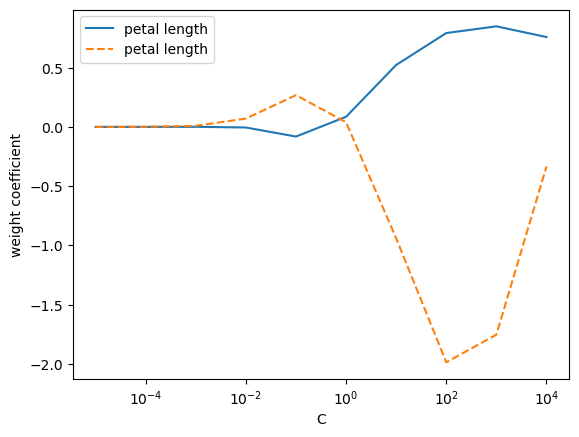

In [53]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=1)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal length')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')